# Mineração de Dados
### Pedro Alves G. Jr - 383876

In [1]:
import numpy as np

In [2]:
import sklearn.datasets as datasets

In [3]:
X, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=20,
                                      coef=True, random_state=0)

In [4]:
X = X[:,0]

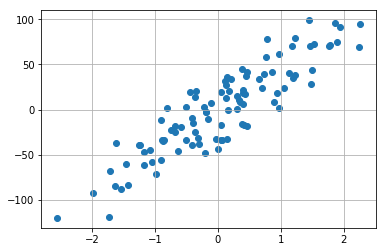

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid()
plt.scatter(X, y)

In [6]:
coef

array(42.38550486)

### Error
$$ Error_{\beta_0, \beta_1} = \frac{1}{N} \sum_{i=1}^{N}{(y_i - (\beta_1 \cdot x_i + \beta_0))^{2}} $$
### Derivada Parcial
$$ \frac{\partial}{\partial \beta_0} = \frac{2}{N} \sum_{i=1}^{N} -(y_i (\beta_1 \cdot x_i + \beta_0))^{2} $$

In [7]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    N = len(y)
    totalError = 1/N * np.sum((y - (b1 * x + b0)) ** 2)
    return totalError

In [8]:
def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = len(y)
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

In [9]:
def gradient_descent_runner(x, y, b0, b1, learning_rate, epoch):
    for _ in range(epoch):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

In [10]:
b0 = 0

In [11]:
b1 = 0

In [12]:
y.shape

(100,)

In [13]:
compute_error_for_line_given_points(b0, b1, X, y)

2323.0337018661576

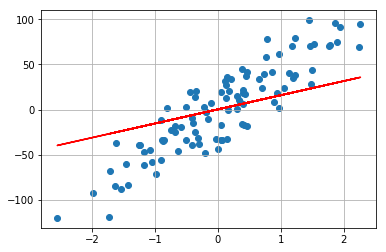

In [18]:
y_ = b0 + b1*X
plt.scatter(X, y)
plt.plot(X, y_, c='r')
plt.grid()

In [17]:
b0, b1 = step_gradient(b0, b1, X, y, 0.1)

In [19]:
b0, b1 = gradient_descent_runner(X, y, b0, b1, 0.01, 1000)
compute_error_for_line_given_points(b0, b1, X, y)

456.68594467277944

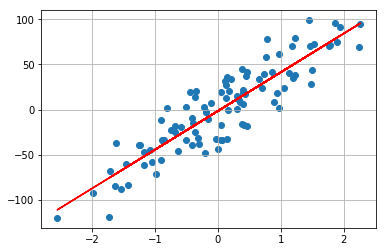

In [20]:
y_ = b0 + b1*X
plt.scatter(X, y)
plt.plot(X, y_, c='r')
plt.grid()

### Explorando  House Prices dataset

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [21]:
# Biblioteca para manipulação dos dados
import pandas as pd

# Leitura dos dados
df = pd.read_csv('housing.data', header=None, sep='\s+')

# Definindo quais são as features (colunas)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Mostrando os 5 primeiros elementos do conjunto de dados
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizando características importantes do dataset

In [22]:
# Bibliotecas para visualização de dados
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/home/pedim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


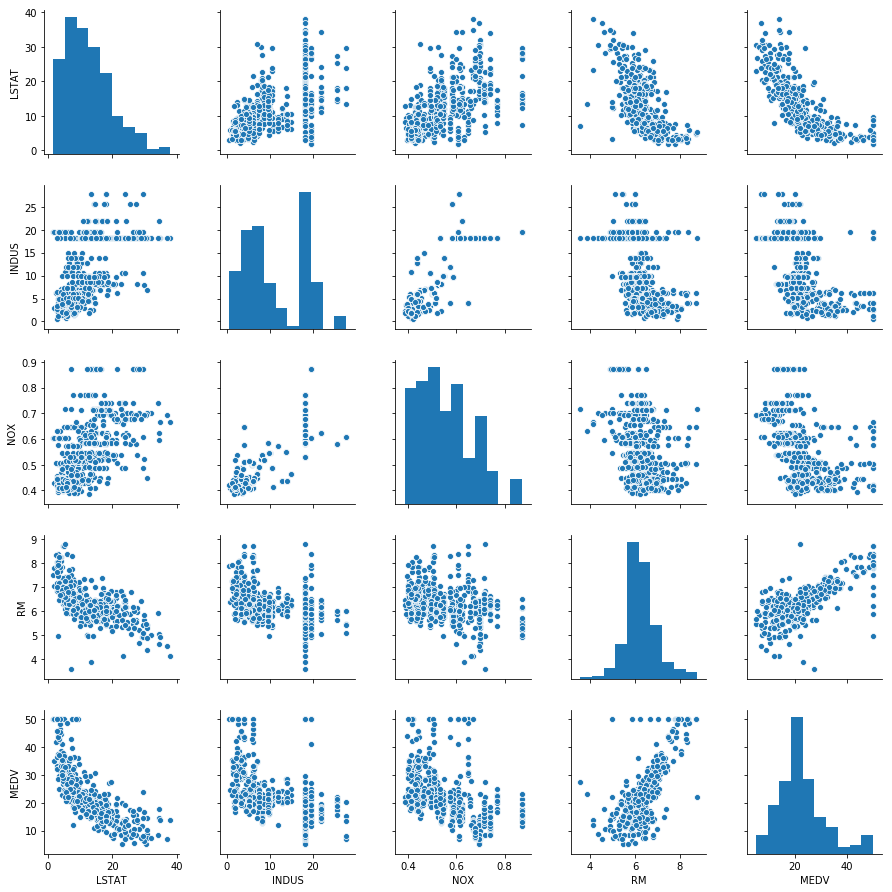

In [31]:
# Selecionando algumas features do conjunto de dados para visualização
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# Plotando esses dados através da biblioteca Seaborn, usando o método Pairplot
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

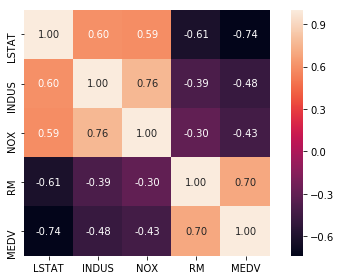

In [32]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [33]:
df.corr().style.background_gradient(cmap='Reds', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


# Utilize uma regressão linear simples, baseada no erro quadrático


Nesta atividade utilize apenas o atributo de maior correlação com o preço para ser a variável independente (x). Use o método GD  e estime o erro utilizando as funções que foram implementadas anteriormente.

In [34]:
X = df[['RM']].values
y = df['MEDV'].values

# SEU CÓDIGO AQUI
def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, 
                                                           compute_error_for_line_given_points(initial_b0, 
                                                                                               initial_b1, x, y)))
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, 
                                                                           compute_error_for_line_given_points(b0, b1, 
                                                                                                               x, y)))

In [35]:
class Regressao():
    def __init__(self, initial_b0 = 0, initial_b1 = 0, learning_rate = 0.01, epoch = 1000):
        self.b0 = initial_b0
        self.b1 = initial_b1
        self.learning_rate = learning_rate
        self.epoch = epoch
        
    def fit(self, X, y):
        self.b0, self.b1 = gradient_descent_runner(X, y, self.b0, self.b1, self.learning_rate, self.epoch)
        
    def predict(self, X):
        return self.b0 + X*self.b1

In [36]:
#funçao para plotar o resultado
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

## Regressão usando o skcikit learn

In [37]:
from sklearn.linear_model import SGDRegressor

Use o método fit para treinar o modelo e o método predict para obter os valores preditos

In [38]:
slr = SGDRegressor()

# SEU CÓDIGO AQUI
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 5.221
Intercept: -9.593


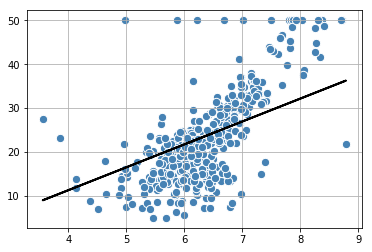

In [39]:
plt.grid()
lin_regplot(X, y, slr)

Use o método do scikit learn para calcular o erro

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# SEU CÓDIGO AQUI
mean_squared_error(y, y_pred)

51.493391051886185

###  Aplique o mesmo método acima considerando um conjunto maior de atributos   

In [43]:
X = df.iloc[:, :-1] # você pode escolher outro conjunto de atributos
y = df.iloc[:, -1]

In [44]:
# SEU CÓDIGO AQUI
model = SGDRegressor()
model.fit(X, y)
y_pred = model.predict(X)

In [45]:
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y, y_pred)))

MSE train: %.3f, test: %.3f 7.543660758501442e+27


Que tal usarmos a padronização dos atributos para tentar obter um resultado melhor?

## Scalonamento de atributos

A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina: eles podem se comportar mal se os atributos individuais não parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com 0 média e variação de unidade).


Normalize os atributos removendo a média e escalonando para uma unidade de variância 
Nesse caso, o valor padronizado de x é calculado como:

z = (x - u) / s

Para isso, utilize o módulo StandardScaler do scikit learn. Crie um objeto tipo StandardScaler para aplicar em x, salve o resultado na variavel  e um outro para aplicar e aplique o fit_transform. Para voltar ao dado original use inverse_transform. 

In [46]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# SEU CÓDIGO AQUI
# Ajustando e transformando os dados
X = sc_x.fit_transform(X)

Treine o modelo com os dados transformados

In [47]:
# SEU CÓDIGO AQUI

# Criando o modelo
slr = SGDRegressor()

# Ajustando o modelo aos conjuntos de dados selecionados
slr.fit(X, y)

# Fazendo uma predição sobre esse dados
y_pred = slr.predict(X)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.854
Intercept: 22.535


In [48]:
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y, y_pred)))

MSE train: %.3f, test: %.3f 22.016062390245438


### Crie novamente um modelo, dessa vez separando os dados de treino e teste. Aplique o Grandiente descendente, plot o resultato, calcule o erro quadrático médio para os dados de teste.

In [49]:
# Importando o método de divisão de dados para treino e teste
from sklearn.model_selection import train_test_split

In [50]:
# Separando a label dos dados usando o método iloc do Pandas que separa levando em consideração o índice do dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [51]:
# Dividindo os dados em treino e teste, com 80% para treino e 20% para teste e usando a semente 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Verificando o tamanho de cada conjunto de dado após a divisão em treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [53]:
# Instanciando a Padronizador de dados
scale = StandardScaler()

# Ajustando e prodronizando os dados de treino
X_train_std = scale.fit_transform(X_train)

# Padronizando os dados de teste, não se ajusta os dados de teste, pois, não se pode conhecer os dados
X_test_std = scale.transform(X_test)

In [54]:
# Criando o modelo
model = SGDRegressor()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo a predição com os dados de teste
y_pred = model.predict(X_test)

In [55]:
# Erro médio quadrado do scikit
mse = mean_squared_error(y_test, y_pred)
mse

4.050636098145349e+26

In [56]:
# Raíz quadrada do erro médio quadrado
rmse = np.sqrt(mse)
rmse

20126192133996.31

In [57]:
# Criando o modelo
model_std = SGDRegressor()

# Treinando com os dados de treino padronizados
model_std.fit(X_train_std, y_train)

# Fazendo a predição sobre os dados de teste
y_pred_std = model_std.predict(X_test_std)

In [58]:
# Erro médio quadrado do scikit
mse_std = mean_squared_error(y_test, y_pred_std)
mse_std

24.7943514158141

In [59]:
# Raíz quadrada do erro médio quadrado
rmse = np.sqrt(mse_std)
rmse

4.979392675398688